# Part II - (is Duration effected by Age and gender ?)
## by (Abdulrahman Al Shawi)

## Investigation Overview


> In this presentation I will focus on trip duration and how it is effected by age and gender

## Dataset Overview and Executive Summary

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, it contains 183,412 data trips with other features such as gender and birth date

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# fix the datatypes

# change the start_time and end_time columns to date type
df[['start_time', 'end_time']] = df[['start_time', 'end_time']].apply(pd.to_datetime)

In [4]:
# add a column called customer age 

df['customer_age'] = 2024 - df['member_birth_year']

## Trip Duration Distribution

> What the duration of most of the trips? This Visualisation shows trip duration distribution 

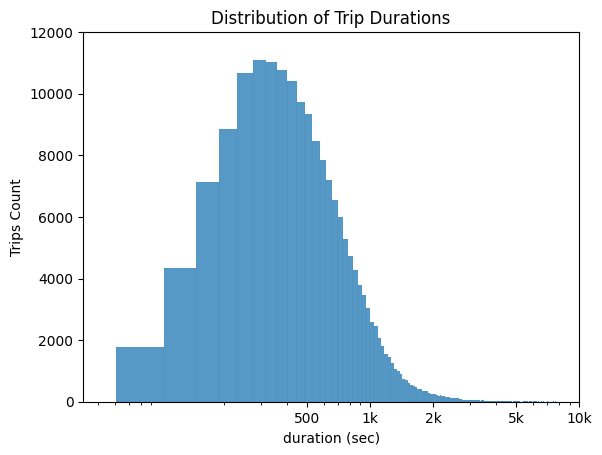

In [5]:
sns.histplot(df['duration_sec'] , bins = 2000, color= "tab:blue")
plt.title('Distribution of Trip Durations')
plt.xlabel('duration (sec)')
plt.ylabel('Trips Count')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 12000]);

## Gender Distribution

> Which gender has the most Trips ? This visualisation shows the distribution of gender

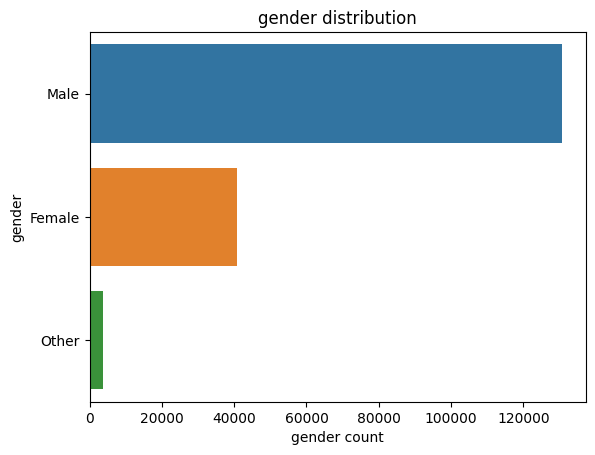

In [6]:
# distribution of gender

sns.barplot(data=df,x= df['member_gender'].value_counts(), y=df['member_gender'].value_counts().index)

plt.xlabel('gender count')
plt.ylabel('gender')
plt.title('gender distribution')
plt.show()

## Trip Duration and Age By Gender

> this Visualisation compares trip duration add age splitted by gender so each figure represent a single gender

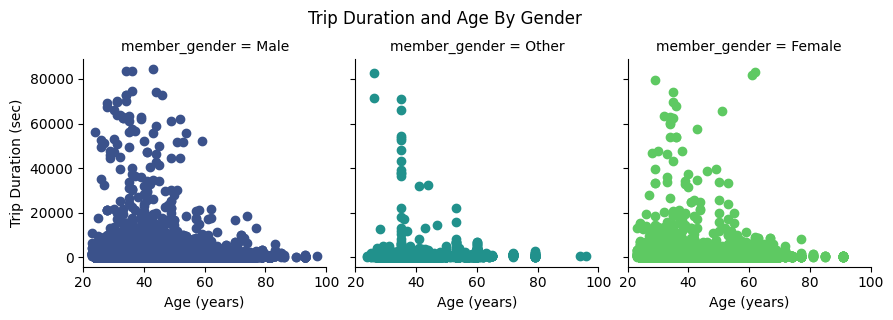

In [7]:
# Create a FacetGrid
g = sns.FacetGrid(df, col='member_gender', hue='member_gender', palette='viridis')

# Map scatter plot
g.map(plt.scatter, 'customer_age', 'duration_sec')

g.set(xlim=(20, 100))
g.set_axis_labels('Age (years)', 'Trip Duration (sec)')
g.fig.suptitle('Trip Duration and Age By Gender', y=1.05);


## Age and Gender

> this visualisation compares the number of trips for all genders where age is over 30 and below 30

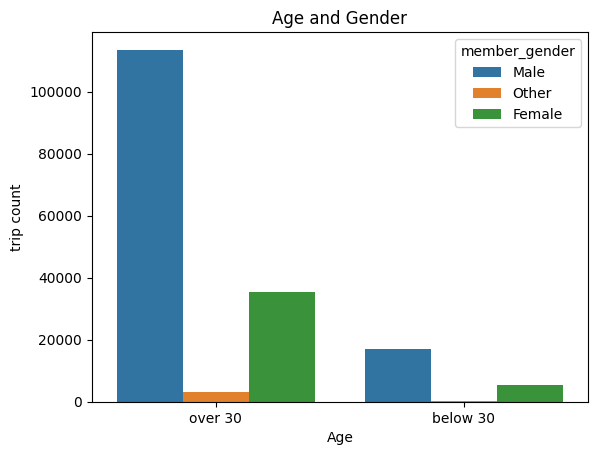

In [8]:
# create a copy to modify it
df_ageGroup = df.copy()
# Define a function to group age
def Grouped_age(age):
    if age < 30:
        return 'below 30'
    elif age >=30:
        return 'over 30'
    else:
        ""

# Apply the function to create the 'age_group' column
df_ageGroup['age_group'] = df_ageGroup['customer_age'].apply(lambda x: Grouped_age(x))

# plotting a clustered chart
sns.countplot(data=df_ageGroup , x='age_group', hue='member_gender')

# add labels
plt.xlabel('Age')
plt.ylabel('trip count')
plt.title('Age and Gender');